### Emely Seheon z5634253

Import statements

In [32]:
import csv   # For saving the results
import numpy as np   # For general purpose array processing
import matplotlib.pyplot as plt   # For plotting
from env import StaticGridEnv   # For the environment
import pandas as pd   # For working with data sets
import seaborn as sns   # For making the heatmap
from utils import plot_comparison_with_baseline   # For comparing the models

#### Task 1: Q-Learning

- Set hyperparameters
- Setup environment with a random seed to ensure results are reproducible
- Track metrics

In [33]:
# Hyperparameters
lr = 0.8          
disc_factor = 0.99
exp_prob = 0.2      
num_episodes = 1000  
max_steps = 100  

# Initialize environment
env = StaticGridEnv(seed=42)
q1_table = np.zeros((10, 10, 4)) 

# Metrics tracking
total_rewards1 = []
successful_episodes1 = 0
steps_per_episode1 = []

##### Train the Agent

- Using epsilon-greedy policy
- For each episode:
    - Start in a unique state
    - For each step:
        - Choose action based on the exploration probability
        - Update next step
        - Update the Q value
        - If done, move to the next episode

In [34]:
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_ep_reward = 0
    steps = 0
    
    for step in range(max_steps):
        # Epsilon-greedy action selection
        if np.random.rand() < exp_prob:
            action = np.random.choice(4)  # Random action
        else:
            action = np.argmax(q1_table[state[0], state[1]])  # Best action
        
        # Take action, observe reward and next state
        next_state, reward, done, _ = env.step(action)
        total_ep_reward += reward
        
        # if episode > 700:
        #     env.render ( episode = episode , learning_type =" Q learning ")

        # Update Q-value
        q1_table[state[0], state[1], action] = (1 - lr) * q1_table[state[0], state[1], action] \
                                             + lr * (reward + disc_factor * q1_table[next_state[0], next_state[1], np.argmax(q1_table[next_state[0], next_state[1]])])
        
        # Move to next state
        state = next_state
        steps += 1
        
        # End episode if goal is reached
        if done:
            successful_episodes1 += 1
            break

    total_rewards1.append(total_ep_reward)
    steps_per_episode1.append(steps)

##### Evaluate the model

- Success rate
- Average reward
- Average learning speed

In [35]:
# Calculate performance metrics
success_rate = (successful_episodes1 / num_episodes) * 100
avg_reward = np.mean(total_rewards1)
avg_learning_speed = 1 / np.mean(steps_per_episode1)

# Print results
print(f"Success Rate: {success_rate}%")
print(f"Average Reward per Episode: {avg_reward}")
print(f"Average Learning Speed: {avg_learning_speed}")

Success Rate: 98.9%
Average Reward per Episode: 7.02
Average Learning Speed: 0.075046904315197


Cumulative Reward over Episode Plot

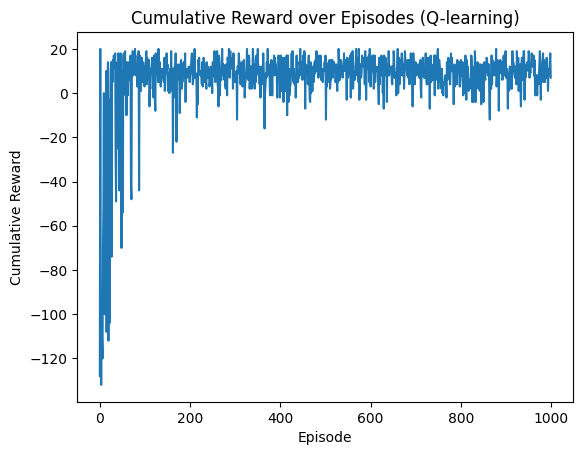

In [36]:
# Plot cumulative reward over episodes
plt.plot(total_rewards1)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward over Episodes (Q-learning)")
plt.show()

# Save results for later comparison
results1 = (avg_reward, success_rate, avg_learning_speed)
with open('task1results.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(results1)

#### Task 2: SARSA

- Set hyperparameters
- Setup environment with a random seed to ensure results are reproducible
- Track metrics

In [37]:
# Hyperparameters
lr = 0.5     
disc_factor = 0.97
exp_prob = 0.2
num_episodes = 1000  
max_steps = 100    

# Initialize environment
env = StaticGridEnv(seed=42)
q2_table = np.zeros((10, 10, 4))  

# Metrics tracking
total_rewards = []
successful_episodes = 0
steps_per_episode = []  

##### Train the Agent

- Using epsilon-greedy policy
- For each episode:
    - Start in a unique state
    - Choose initial action based on the exploration probability
    - For each step:
        - Update next step
        - Choose action based on the exploration probability
        - Update the Q value
        - If done, move to the next episode

In [38]:
for episode in range(num_episodes):
    state = env.reset()
    
    # Choose the first action using epsilon-greedy policy
    if np.random.rand() < exp_prob:
        action = np.random.choice(4)  # Random action
    else:
        action = np.argmax(q2_table[state[0], state[1]])  # Best action

    done = False
    total_reward = 0
    steps = 0

    for step in range(max_steps):
        # Take action, observe reward and next state
        next_state, reward, done, _ = env.step(action)
        total_reward += reward

        # Choose next action using epsilon-greedy policy
        if np.random.rand() < exp_prob:
            next_action = np.random.choice(4)  # Random action
        else:
            next_action = np.argmax(q2_table[next_state[0], next_state[1]])  # Best action

        # Update Q-value (SARSA update)
        q2_table[state[0], state[1], action] = (1 - lr) * q2_table[state[0], state[1], action] \
                                             + lr * (reward + disc_factor * q2_table[next_state[0], next_state[1], next_action])

        # Move to the next state and action
        state = next_state
        action = next_action
        steps += 1

        # End episode if goal is reached
        if done:
            successful_episodes += 1
            break

    total_rewards.append(total_reward)
    steps_per_episode.append(steps)

##### Evaluate the model

- Success rate
- Average reward
- Average learning speed

In [39]:
# Calculate performance metrics
success_rate = (successful_episodes / num_episodes) * 100
avg_reward = np.mean(total_rewards)
avg_learning_speed = 1 / np.mean(steps_per_episode)

# Print results
print(f"Success Rate: {success_rate}%")
print(f"Average Reward per Episode: {avg_reward}")
print(f"Average Learning Speed: {avg_learning_speed}")

Success Rate: 98.6%
Average Reward per Episode: 5.906
Average Learning Speed: 0.0698909700866648


Cumulative Reward over Episode Plot

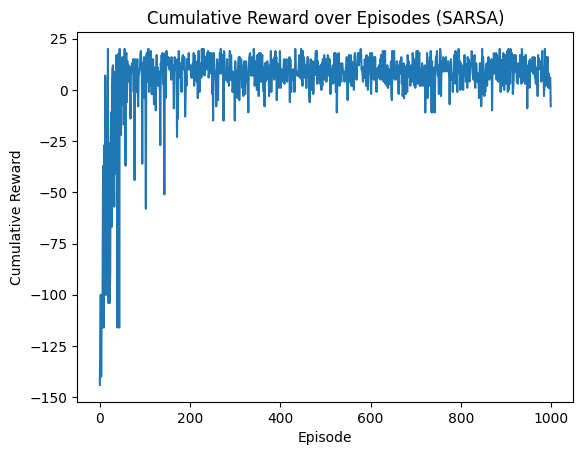

In [40]:
# Plot cumulative reward over episodes
plt.plot(total_rewards)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward over Episodes (SARSA)")
plt.show()

# Save results for later comparison
results2 = (avg_reward, success_rate, avg_learning_speed)
with open('task2results.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(results2)

#### Task 3: Teacher Advice with Q-Learning Agent

- Set hyperparameters
- Setup environment with a random seed to ensure results are reproducible

In [41]:
# Hyperparameters
lr = 0.8          
disc_factor = 0.99
exp_prob = 0.2      
num_episodes = 1000  
max_steps = 100  

availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# Initialize environment
env = StaticGridEnv(seed=42)

##### Function to Train the Agent

- Using epsilon-greedy policy
- Track metrics
- For each episode:
    - Start in a unique state
    - For each step:
        - Decide whether or not to use teacher's advice
        - Choose action based on the accuracy or the exploration probability
        - Update next step
        - Update the Q value
        - If done, move to the next episode
- Calculate perfomance metrics

In [42]:
# Function to train with teacher advice
def train_with_teacher(availability, accuracy):
    student_q1_table = np.zeros((10, 10, 4))  # New Q-table for the student
    total_rewards = []
    successful_episodes = 0
    steps_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0

        for step in range(max_steps):
            # Decide whether to use teacher's advice
            if np.random.rand() < availability:  # Check if advice is available
                if np.random.rand() < accuracy:  # Check if advice is correct
                    action = np.argmax(q1_table[state[0], state[1]])
                else:
                    action = np.random.choice([a for a in range(4) if a != np.argmax(q1_table[state[0], state[1]])])
            else:
                # Epsilon-greedy action selection for the student agent
                if np.random.rand() < exp_prob:
                    action = np.random.choice(4)  # Random action
                else:
                    action = np.argmax(student_q1_table[state[0], state[1]])

            # Take action, observe reward and next state
            next_state, reward, done, _ = env.step(action)
            total_reward += reward

            # Q-learning update
            best_next_action = np.argmax(student_q1_table[next_state[0], next_state[1]])
            student_q1_table[state[0], state[1], action] = (1 - lr) * student_q1_table[state[0], state[1], action] \
                                                        + lr * (reward + disc_factor * student_q1_table[next_state[0], next_state[1], best_next_action])

            # Move to the next state
            state = next_state
            steps += 1

            # End episode if goal is reached
            if done:
                successful_episodes += 1
                break

        total_rewards.append(total_reward)
        steps_per_episode.append(steps)

    # Calculate performance metrics
    success_rate = (successful_episodes / num_episodes) * 100
    avg_reward = np.mean(total_rewards)
    avg_learning_speed = 1 / np.mean(steps_per_episode)

    return availability, accuracy, avg_reward, success_rate, avg_learning_speed

Collect results for each availability and accuracy combination

In [43]:
results3 = []
for availability in availability_values:
    for accuracy in accuracy_values:
        result = train_with_teacher(availability, accuracy)
        results3.append(result)

Dataframe

In [44]:
# Create DataFrame for the results
df_results3 = pd.DataFrame(results3, columns=["Availability", "Accuracy", "Avg Reward", "Success Rate (%)", "Avg Learning Speed"])
df_results3.to_csv('task3results.csv', index=False)
print(df_results3)

    Availability  Accuracy  Avg Reward  Success Rate (%)  Avg Learning Speed
0            0.2       0.2       2.347              98.8            0.057720
1            0.2       0.4       4.758              98.6            0.064986
2            0.2       0.6       5.176              98.7            0.066494
3            0.2       0.8       7.239              99.2            0.075386
4            0.2       1.0       8.281              99.5            0.081526
5            0.4       0.2      -4.526              98.7            0.041797
6            0.4       0.4       1.078              98.7            0.053008
7            0.4       0.6       5.642              99.7            0.067536
8            0.4       0.8       7.656              99.9            0.076929
9            0.4       1.0      10.234             100.0            0.094393
10           0.6       0.2     -23.654              93.8            0.025186
11           0.6       0.4      -4.308              98.9            0.042624

Heatmap

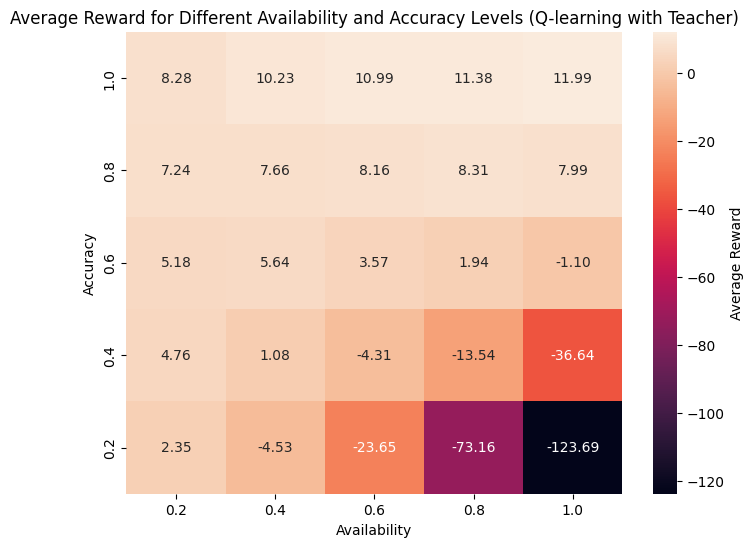

In [45]:
# Plot heatmap of average reward for each combination of availability and accuracy
heatmap_data = df_results3.pivot(index="Accuracy", columns="Availability", values="Avg Reward")
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cbar_kws={'label': 'Average Reward'}).invert_yaxis()
plt.title("Average Reward for Different Availability and Accuracy Levels (Q-learning with Teacher)")
plt.xlabel("Availability")
plt.ylabel("Accuracy")
plt.show()


#### Task 4: Teacher Advice with SARSA Agent

- Set hyperparameters
- Setup environment with a random seed to ensure results are reproducible

In [46]:
# Hyperparameters
lr = 0.5     
disc_factor = 0.97
exp_prob = 0.2
num_episodes = 1000  
max_steps = 100 

availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# Initialize environment
env = StaticGridEnv(seed=42)

##### Function to Train the Agent

- Using epsilon-greedy policy
- Track metrics
- For each episode:
    - Start in a unique state
    - Choose initial action based on the exploration probability
    - For each step:
        - Update next step
        - Decide whether or not to use teacher's advice
        - Choose action based on the accuracy or the exploration probability
        - Update the Q value
        - If done, move to the next episode
- Calculate perfomance metrics

In [47]:
# Define SARSA update function with teacher advice
def sarsa_with_teacher(availability, accuracy):
    # Initialize Q-table
    student_q2_table = np.zeros((10, 10, 4))
    total_rewards = []
    successful_episodes = 0
    steps_per_episode = []
    
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        steps = 0
        
        # Initial action selection using epsilon-greedy
        if np.random.rand() < exp_prob:
            action = np.random.choice([0, 1, 2, 3])
        else:
            action = np.argmax(student_q2_table[state[0], state[1]])
        
        for step in range(max_steps):
            # Teacher advice mechanism
            if np.random.rand() < availability:  # Check if advice is given
                if np.random.rand() < accuracy:
                    # Correct advice: Choose best action from Q-table
                    action = np.argmax(q2_table[state[0], state[1]])
                else:
                    # Incorrect advice: Choose a random action (excluding best)
                    action = np.random.choice([a for a in range(4) if a != np.argmax(q2_table[state[0], state[1]])])
            # Perform the action in the environment
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            
            # Next action selection using epsilon-greedy
            if np.random.rand() < exp_prob:
                next_action = np.random.choice([0, 1, 2, 3])
            else:
                next_action = np.argmax(student_q2_table[next_state[0], next_state[1]])
            
            # SARSA update rule
            student_q2_table[state[0], state[1], action] += lr * (reward + disc_factor * student_q2_table[next_state[0], next_state[1], next_action] - student_q2_table[state[0], state[1], action])
            
            # Update state and action
            state = next_state
            steps += 1
            action = next_action

            # End episode if goal is reached
            if done:
                successful_episodes += 1
                break
        
        total_rewards.append(total_reward)
        steps_per_episode.append(steps)

    # Calculate metrics
    success_rate = (successful_episodes / num_episodes) * 100
    avg_reward = np.mean(total_rewards)
    avg_learning_speed = 1 / np.mean(steps_per_episode)
    return availability, accuracy, avg_reward, success_rate, avg_learning_speed

Collect results for each availability and accuracy combination

In [48]:
# Run experiments for each combination of availability and accuracy
results4 = []
for availability in availability_values:
    for accuracy in accuracy_values:
        result = train_with_teacher(availability, accuracy)
        results4.append(result)

Dataframe

In [49]:
# Convert results to DataFrame
df_results4 = pd.DataFrame(results4, columns=["Availability", "Accuracy", "Avg Reward", "Success Rate (%)", "Avg Learning Speed"])
df_results4.to_csv('task4results.csv', index=False)
print(df_results4)

    Availability  Accuracy  Avg Reward  Success Rate (%)  Avg Learning Speed
0            0.2       0.2       2.278              98.6            0.057524
1            0.2       0.4       3.908              98.5            0.062418
2            0.2       0.6       5.273              99.1            0.066094
3            0.2       0.8       6.580              99.3            0.072166
4            0.2       1.0       7.605              99.4            0.077369
5            0.4       0.2      -4.941              98.2            0.041338
6            0.4       0.4       0.455              98.6            0.052043
7            0.4       0.6       4.322              99.5            0.062418
8            0.4       0.8       7.198              99.9            0.074621
9            0.4       1.0       9.457             100.0            0.088098
10           0.6       0.2     -21.113              95.5            0.026582
11           0.6       0.4      -5.104              98.5            0.041266

Heatmap

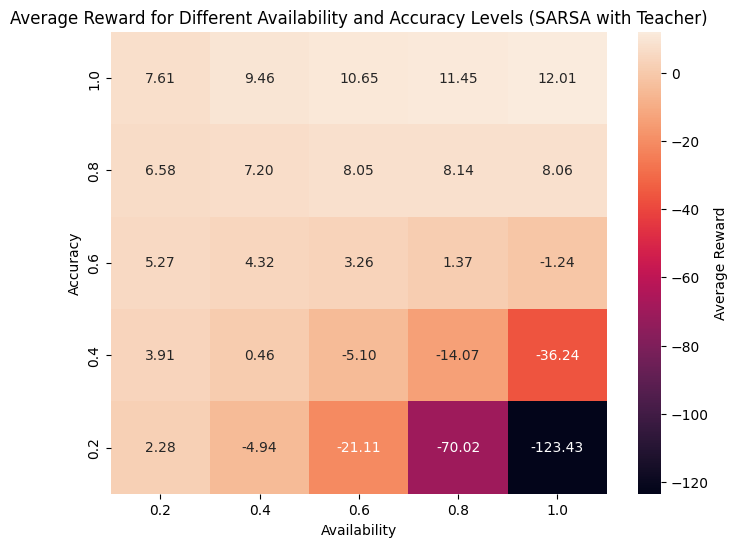

In [50]:
# Generate heatmap for average reward
heatmap_data = df_results4.pivot(index="Accuracy", columns="Availability", values="Avg Reward")
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cbar_kws={'label': 'Average Reward'}).invert_yaxis()
plt.title("Average Reward for Different Availability and Accuracy Levels (SARSA with Teacher)")
plt.xlabel("Availability")
plt.ylabel("Accuracy")
plt.show()

#### Comparison of Baseline Agents and Agents Trained with Teacher Advice

Q-Learning

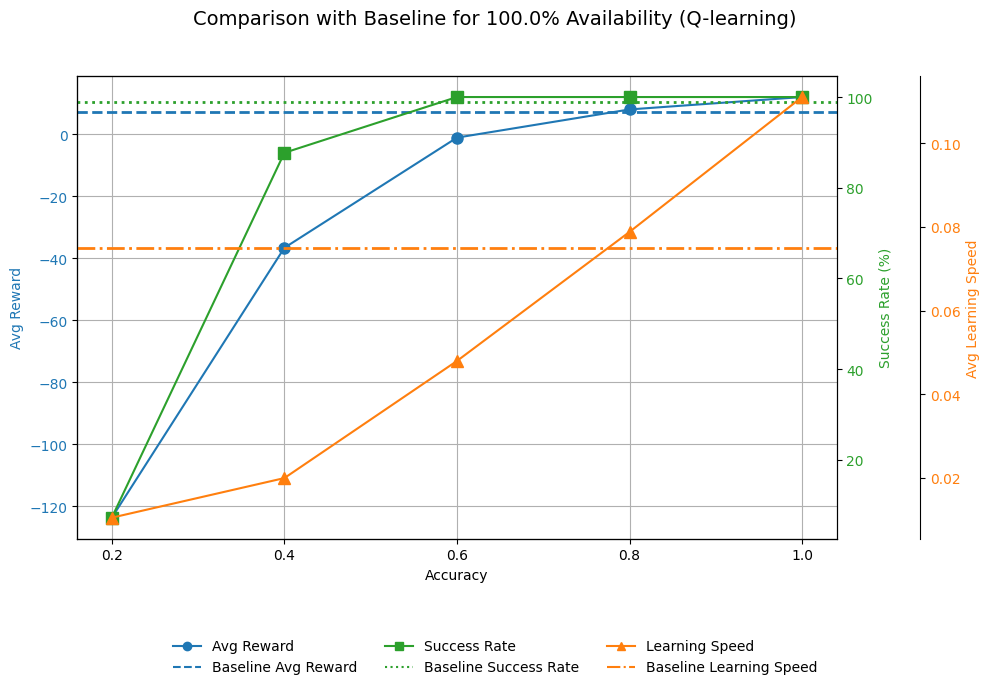

In [51]:
availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# Load data
with open('task1results.csv', mode='r') as file:
    reader = csv.reader(file)
    row = next(reader)
    results1 = tuple(map(float, row))

results3 = pd.read_csv('task3results.csv')

# Plot comparison
plot_comparison_with_baseline(
    availability=1.0,
    df_learning=results3,
    baseline_learning=results1,
    accuracies=accuracy_values,
    algorithm="Q-learning"
)

SARSA

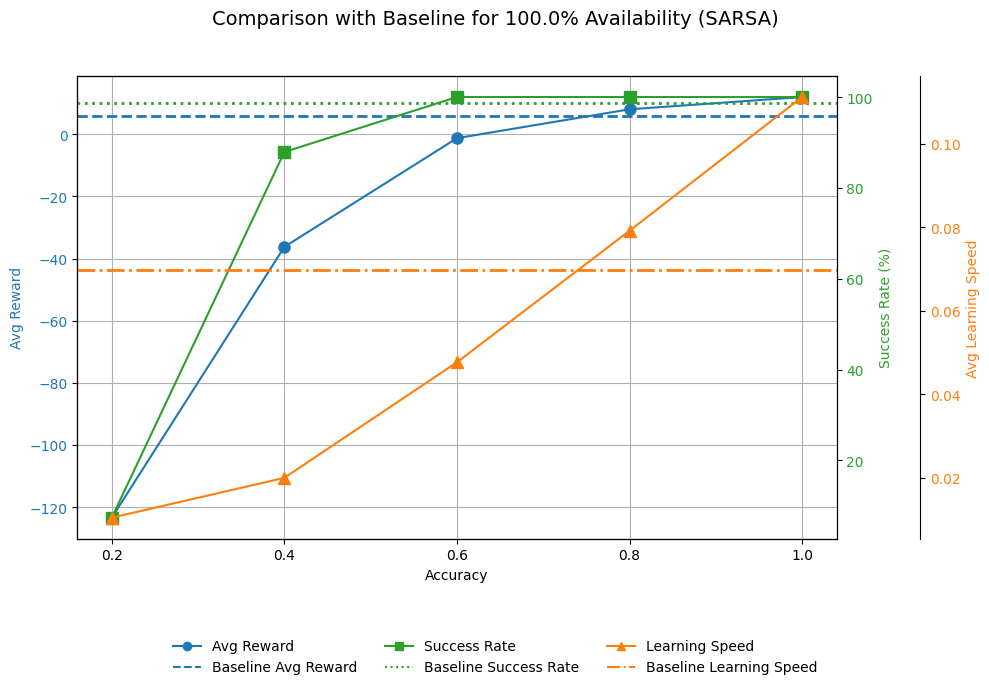

In [52]:
availability_values = [0.2, 0.4, 0.6, 0.8, 1.0]
accuracy_values = [0.2, 0.4, 0.6, 0.8, 1.0]

# Load data
with open('task2results.csv', mode='r') as file:
    reader = csv.reader(file)
    row = next(reader)
    results2 = tuple(map(float, row))

results4 = pd.read_csv('task4results.csv')

# Plot comparison
plot_comparison_with_baseline(
    availability=1.0,
    df_learning=results4,
    baseline_learning=results2,
    accuracies=accuracy_values,
    algorithm="SARSA"
)